(0, 1)

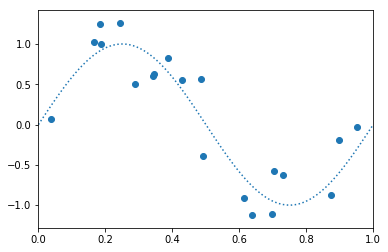

In [126]:
import numpy as np

#乱数のシードを設定
np.random.seed(9)
#0から1まで100個の数値を生成、乱数要素を混ぜる前のx
x_orig = np.linspace(0, 1, 100)

def f(x):
    #xに対応するsinを返す関数
    return np.sin(2 * np.pi * x)

#0から1まで100個のばらけたサンプルデータxを生成する。[:, np.newaxis]はデータを行として並べるため
x = np.random.uniform(0, 1, size=100)[:, np.newaxis]
#xに対応するsinに乱数値を足してサンプルデータyを生成
y = f(x) + np.random.normal(scale=0.3, size=100)[:, np.newaxis]

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split #サンプルデータを学習用とテスト用に分けるためのライブラリ

#学習用とテスト用に分ける
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.8)

plt.plot(x_orig, f(x_orig), ls=':')
plt.scatter(x_train, y_train)
plt.xlim((0, 1))

AxesSubplot(0.125,0.536818;0.352273x0.343182)
1
Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])
AxesSubplot(0.547727,0.536818;0.352273x0.343182)
4
Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])
AxesSubplot(0.125,0.125;0.352273x0.343182)
8
Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=8, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])
AxesSubplot(0.547727,0.125;0.352273x0.343182)
15
Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=15, include_bias=True, inter

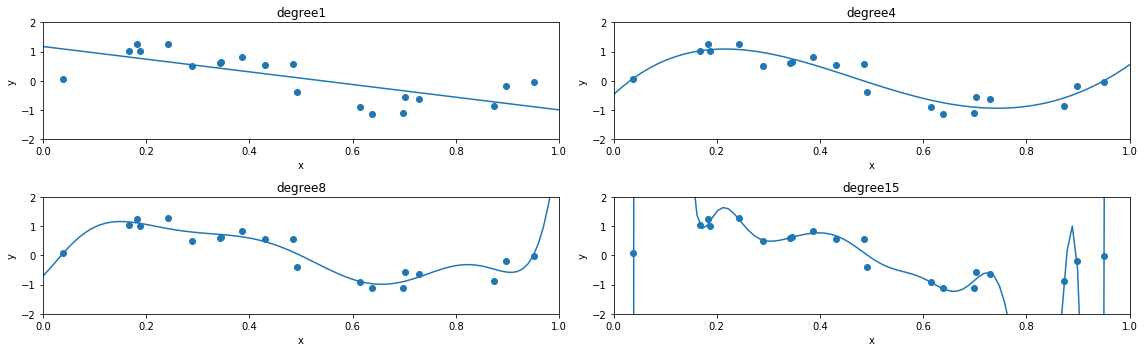

In [136]:
#sciket-learn 読み：サイキットラーン
from sklearn.linear_model import LinearRegression #線形回帰 (単回帰分析・重回帰分析)を取り入れるためのライブラリ
from sklearn.preprocessing import PolynomialFeatures #非線形性を取り入れるためのライブラリ
from sklearn.pipeline import make_pipeline

#2*2のグラフを描く準備をする。
fig, axs = plt.subplots(2, 2, figsize=(16, 5))

#次数0, 1, 3, 9について学習した結果を表示
for ax, deg in zip(axs.ravel(), [1, 4, 8, 15]):
    print(ax)
    print(deg)
    e = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    print(e)
    #学習セットで学習をする
    e.fit(x_train, y_train)
    #元のxを与えて予測
    px = e.predict(x_orig[:, np.newaxis])
    #予測結果のグラフとテストデータの点を描写
    ax.scatter(x_train, y_train)
    ax.plot(x_orig, px)
    ax.set(xlim=(0, 1), ylim=(-2, 2), ylabel='y', xlabel='x', title='degree{}'.format(deg))

plt.tight_layout() #ラベルが重ならないように自動調整

[0.61137934 0.29086734 0.28481265 0.0777883  0.07633086 0.07625964
 0.074961   0.06263091 0.06076737 0.03680033]
[0.55111023 0.25855309 0.27072299 0.10085553 0.10127945 0.09979945
 0.10056814 0.24873586 0.20788337 3.51780925]


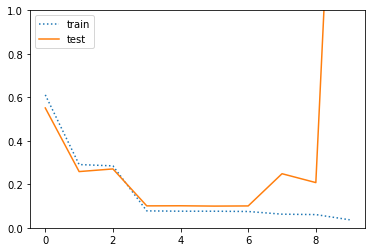

In [123]:
from sklearn.metrics import mean_squared_error #平均2乗誤差を求めるためのライブラリ

#実データとの誤差を保存するarray
train_error = np.empty(10) #empty関数は初期化されていない配列を生成する。その分若干処理速度が早い。
test_error = np.empty(10)

#次数0から9について調べる。
for deg in range(10):
    #モデルを作る
    e = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    e.fit(x_train, y_train) #学習セットで学習、関数を求める
    #テストデータを使って、予測値と実際の値の誤差を調べる。predict関数でfit関数で予測した関数に値を代入する
    train_error[deg] = mean_squared_error(y_train, e.predict(x_train))
    test_error[deg] = mean_squared_error(y_test, e.predict(x_test))
    
print(train_error)
print(test_error)

#グラフを描く
plt.plot(np.arange(10), train_error, ls=':', label='train')
plt.plot(np.arange(10), test_error, ls='-', label='test')
plt.ylim((0, 1))
plt.legend(loc='upper left') #判例の位置